In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_excel('CCPP/Folds5x2_pp.xlsx')
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [3]:
df.shape

(9568, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
AT    9568 non-null float64
V     9568 non-null float64
AP    9568 non-null float64
RH    9568 non-null float64
PE    9568 non-null float64
dtypes: float64(5)
memory usage: 373.8 KB


In [5]:
#Sample train sizes
train_sizes = [1, 100, 500, 2000, 5000, 7654]

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve

In [7]:
features = ['AT', 'V', 'AP', 'RH']
target = ['PE']
train_sizes, train_scores, val_scores = learning_curve(estimator = LinearRegression(),
                                                      X = df[features],
                                                      y = df[target],
                                                      train_sizes = train_sizes,
                                                      cv= 5,
                                                      scoring = 'neg_mean_squared_error',
                                                      shuffle = True)

In [8]:
#Train scores on 5 CV set
print('-' * 20, 'Train Scores on 5 cv set','-' * 20)
print(train_scores)

-------------------- Train Scores on 5 cv set --------------------
[[ -0.          -0.          -0.          -0.          -0.        ]
 [-22.27486428 -18.41856981 -19.59446329 -18.20791985 -18.62685893]
 [-21.15728901 -20.67511991 -20.39136914 -19.99210586 -22.03169002]
 [-20.64847996 -20.8056297  -21.68452691 -20.6779872  -20.36850367]
 [-20.3886174  -20.65921944 -21.51939084 -21.27458174 -20.01751963]
 [-20.98565335 -20.63006094 -21.04384703 -20.63678602 -20.52902632]]


In [9]:
#Validation scores on 5 CV set
print('-' * 20, 'Validation Scores on 5 cv set','-' * 20)
print(val_scores)

-------------------- Validation Scores on 5 cv set --------------------
[[ -305.92126928 -1085.24948516  -822.55311473  -297.62803549
   -591.54739895]
 [  -22.01514553   -22.00412363   -20.69215226   -23.14440641
    -23.13893569]
 [  -20.09791941   -21.37988072   -19.65991192   -21.64532525
    -21.91727968]
 [  -19.93106973   -21.33391826   -19.7395962    -21.31440162
    -21.71249407]
 [  -19.89581134   -21.32645223   -19.71557468   -21.32136567
    -21.76770226]
 [  -19.9046791    -21.33448781   -19.67831137   -21.31934928
    -21.73737127]]


In [10]:
mean_train_score = -train_scores.mean(axis = 1) 
mean_val_score = -val_scores.mean(axis = 1)
print('Mean Training Scores\n', '-' * 20) 
print(pd.Series(mean_train_score,index = train_sizes))
print('-' * 20)
print('Mean Validation Scores\n', '-' * 20)
print(pd.Series(mean_val_score, index = train_sizes))

Mean Training Scores
 --------------------
1       -0.000000
100     19.424535
500     20.849515
2000    20.837025
5000    20.771866
7654    20.765075
dtype: float64
--------------------
Mean Validation Scores
 --------------------
1       620.579861
100      22.198953
500      20.940063
2000     20.806296
5000     20.805381
7654     20.794840
dtype: float64


In [11]:
import matplotlib.pyplot as plt

(0, 40)

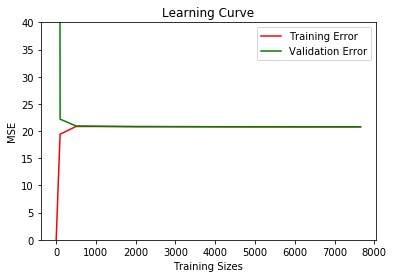

In [12]:
plt.plot(train_sizes, mean_train_score, 'r', label = 'Training Error')
plt.plot(train_sizes, mean_val_score, 'g', label = 'Validation Error')
plt.xlabel('Training Sizes')
plt.ylabel('MSE')
plt.title('Learning Curve')
plt.legend()
plt.ylim(0, 40)

When training set size is 1, we can see that the MSE for training data is 0. This is normal behaviour, since the model 
has no problem fitting perfectly a single data point. But when tested on validation data, the MSE is roughly 430 which 
is obvious as model can't generalise very well trained only on a single data point. As training set size is increased, the error increases sharply while validation error decreases. This is because the model doesn't predict all the instances correctly so the training MSE is greater than zero. However, the model performs much better on validation data because it's estimated with more data. 


This tells us that adding more instances would not improve model's performance or won't leads us to significantly better models. Adding more features would more likely to help the model's performance because it will increase the complexity of the model. How do we determine whether it's a high bias or high variance model? 

If the training error is low, it means that the training data is very well fitted to the model. If the model fits the training data well, it means it has low bias w.r.t that set of data. But, in our case, training error increases as training size increases and become plateaus at certain value of roughly 20. Because our model has high training and validation error, it is a high bias model. 

The solution would be to add more features or increase features using polynomial features or decrease regularization of the learning algorithm.